In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [313]:
df=pd.read_csv("udemy_courses.csv")

In [315]:
df=df.drop_duplicates()

len(df)

3672

In [312]:
df=df.drop_duplicates()
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017,3


Range = 2011 - 2017


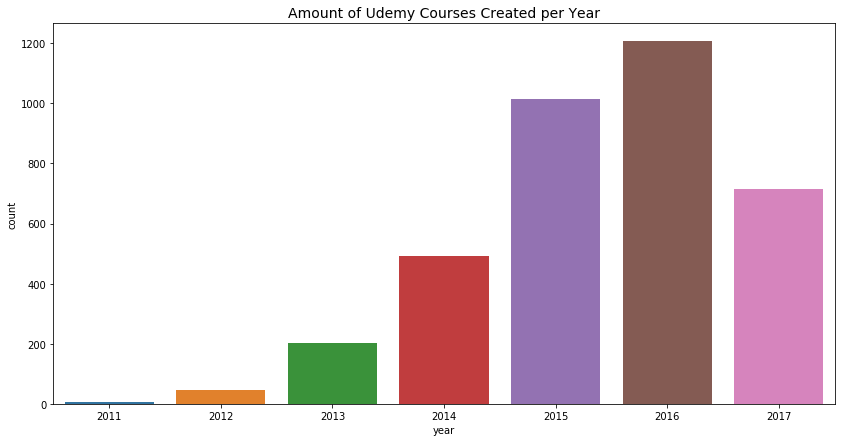

In [287]:
df["year"]=pd.to_datetime(df['published_timestamp']).dt.year
df["month"]=pd.to_datetime(df['published_timestamp']).dt.month
df['date_published']=pd.to_datetime(df['published_timestamp']).dt.date

print("Range =",df['year'].min(),"-",df['year'].max())
df.head(1)





plt.figure(figsize = (14,7))
sns.countplot(x = df['year'], data = df)
plt.title("Amount of Udemy Courses Created per Year", fontsize = 14)
plt.show()

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
year                   3678 non-null int64
month                  3678 non-null int64
dtypes: bool(1), float64(1), int64(7), object(5)
memory usage: 377.3+ KB


True     3368
False     310
Name: is_paid, dtype: int64


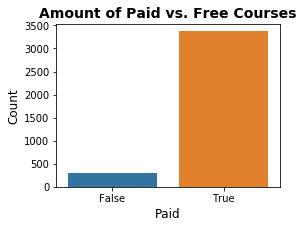

In [289]:
print(df['is_paid'].value_counts())
plt.figure(figsize=(4,3))
g = sns.countplot(df['is_paid'])
g.set_xlabel('Paid', fontsize=12)
g.set_ylabel('Count', fontsize=12)
g.set_title('Amount of Paid vs. Free Courses', fontsize=14, weight='bold')
plt.show()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


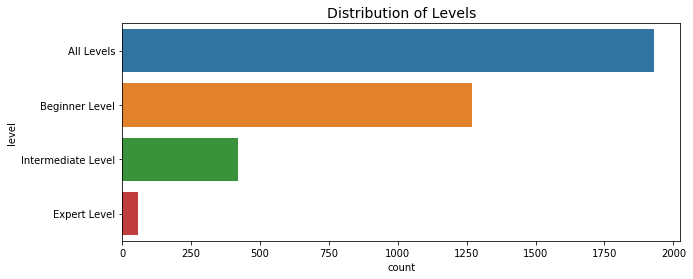

In [290]:
print(df["level"].value_counts())
plt.figure(figsize = (10,4))
sns.countplot(y = df['level'], data = df, order = df.level.value_counts().index)
plt.title("Distribution of Levels", fontsize = 14)
plt.show()


In [291]:

fig=px.bar(df['subject'].value_counts().reset_index(),x='index',y='subject',text='subject',color='subject',title='Distribution of Subjects',labels={'index':'Subject','subject':'No. of courses'})
fig.update_layout(showlegend=False, width=600)
fig.show()

In [292]:
# split paid and free to analyze them seperately

In [293]:
paid_courses=df[df['is_paid']==True]
free_courses=df[df['is_paid']!=True]

In [294]:
#distribution of subjects

Text(0.5, 1.0, 'Subject Distribution by\n\nDistribution by Level')

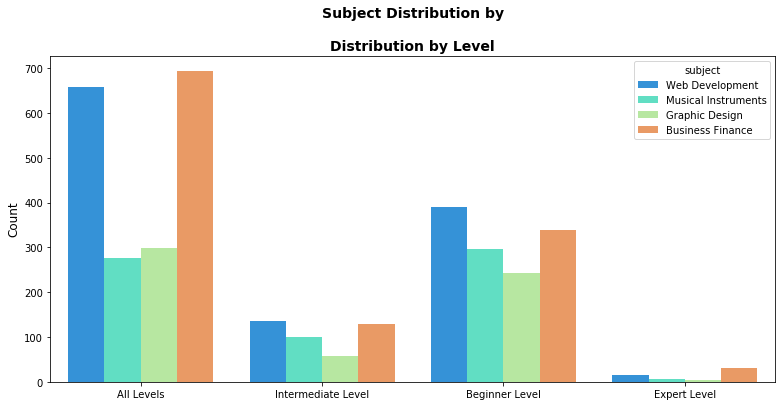

In [374]:
fig = plt.figure(figsize=(13,6))

ax = sns.countplot('level', data=df, palette='rainbow',hue = 'subject')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Subject Distribution by\n\nDistribution by Level', fontsize=14, weight='bold')


Text(0.5, 1.0, 'Subject Distribution by\n\nDistribution by Price')

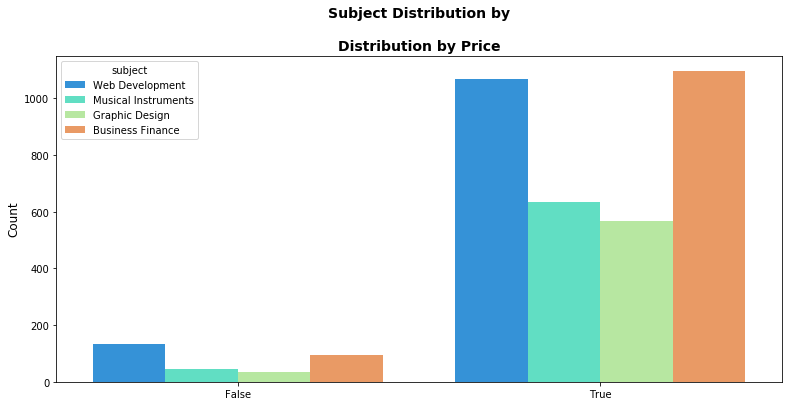

In [373]:
fig = plt.figure(figsize=(13,6))

ax = sns.countplot('is_paid', data=df, palette='rainbow',hue = 'subject')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Subject Distribution by\n\nDistribution by Price', fontsize=14, weight='bold')


Text(0.5, 1.0, 'Subject Distribution by\n\nDistribution by Level')

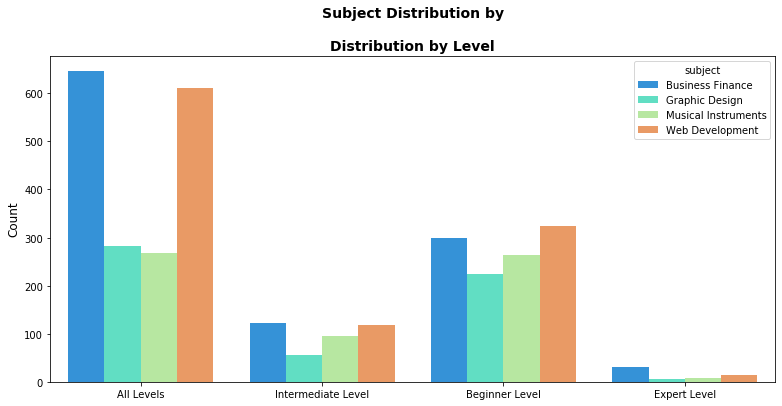

In [372]:
fig = plt.figure(figsize=(13,6))

ax = sns.countplot('level', data=paid_courses, palette='rainbow',hue = 'subject')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Subject Distribution by\n\nDistribution by Level', fontsize=14, weight='bold')


Text(0.5, 1.0, 'Subject Distribution by\n\nDistribution by Level')

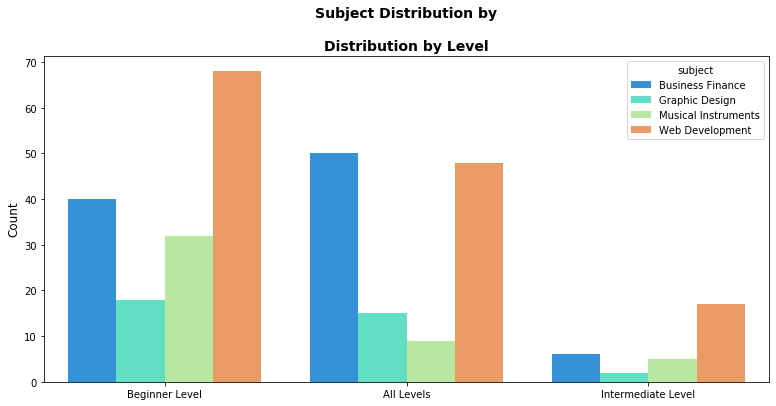

In [371]:
fig = plt.figure(figsize=(13,6))

ax = sns.countplot('level', data=free_courses, palette='rainbow',hue = 'subject')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Subject Distribution by\n\nDistribution by Level', fontsize=14, weight='bold')


Text(0.5, 1.0, 'Popularity by reviews')

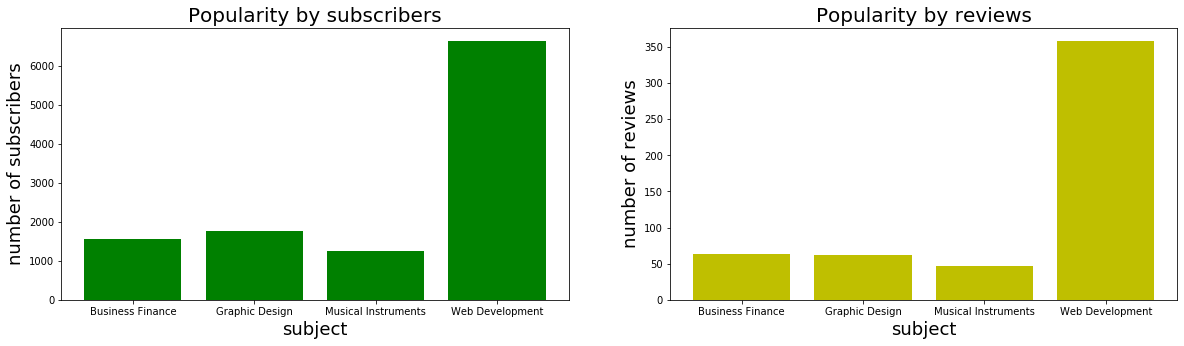

In [299]:
subjectGroup = df.groupby('subject', as_index=False).mean()
fig = plt.figure(figsize=[20,5])
axes = fig.subplots(ncols=2)
axes[0].bar(subjectGroup['subject'].values, subjectGroup['num_subscribers'].values, color='g' )
axes[1].bar(subjectGroup['subject'].values, subjectGroup['num_reviews'].values, color='y' )
axes[0].set_xlabel('subject', fontsize='18')
axes[1].set_xlabel('subject', fontsize='18')
axes[0].set_ylabel('number of subscribers', fontsize=18)
axes[1].set_ylabel('number of reviews', fontsize=18)
axes[0].set_title('Popularity by subscribers', fontsize=20)
axes[1].set_title('Popularity by reviews', fontsize=20)

In [300]:
#distribution by price


Text(0.5, 1.0, 'Distribution of price')

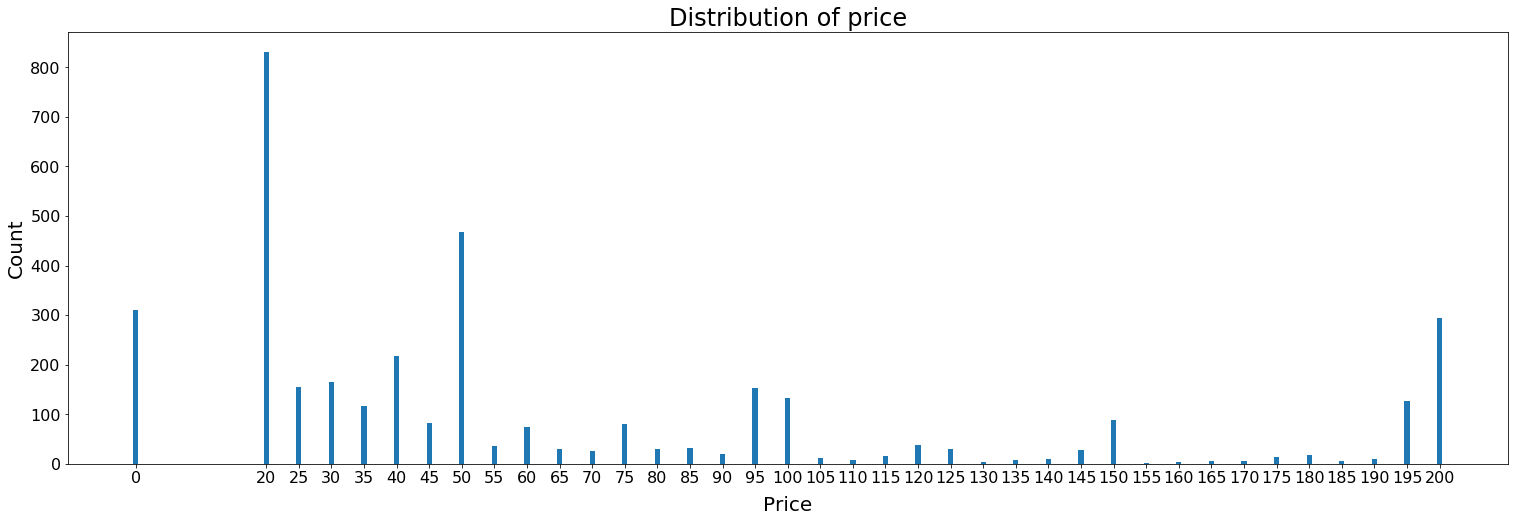

In [301]:
pricevscount = df.loc[:,['price','course_id']].groupby('price', as_index=False).count()
fig = plt.figure(figsize=[20,6])
axes = fig.add_axes([0,0,1,1])
axes.bar(pricevscount['price'], pricevscount['course_id'])
axes.set_xticks(pricevscount['price'].values)
axes.tick_params('x', labelsize=16)
axes.tick_params('y', labelsize=16)
axes.set_xlabel('Price', fontsize=20, labelpad=10)
axes.set_ylabel('Count', fontsize=20)
axes.set_title('Distribution of price', fontsize=24)

In [304]:
subject = paid_courses
subject['count'] = subject.groupby('subject')['is_paid'].transform('count')
subject.drop(['is_paid'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('count')
fig = px.pie(subject, names='subject', values='count', template='seaborn',title='Concentration of paid courses')

fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

C:\Users\tamiz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tamiz\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



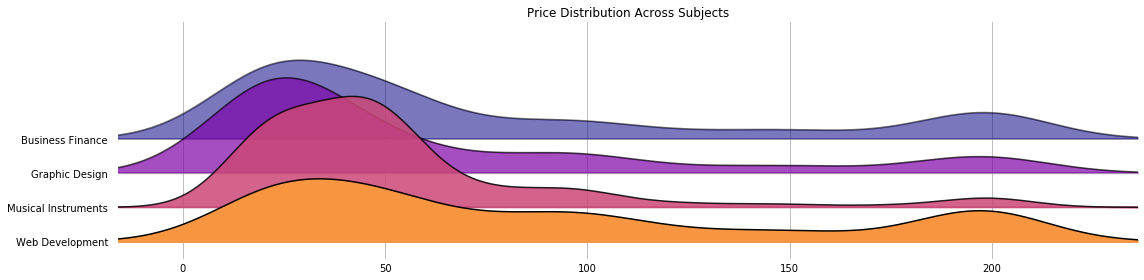

Text(0, 0.5, 'price')

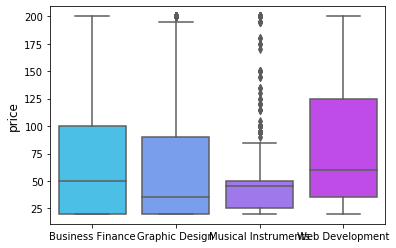

In [305]:
import joypy

fig = joypy.joyplot(paid_courses,
                    by      = 'subject',
                    column  = 'price',
                    figsize = (16,4),
                    grid    = 'both',colormap = plt.cm.plasma,
                    fade      = True,
                    title     = 'Price Distribution Across Subjects',
                    overlap   = 2
                   )
plt.show()
g = sns.boxplot(x='subject', y='price', data=paid_courses, palette='cool')
g.set_xlabel('', fontsize=12)
g.set_ylabel('price', fontsize=12)

In [306]:
p=pd.crosstab(df[df["subject"]=="Business Finance"].is_paid,df.price).stack().reset_index(name='count')
fig=px.bar(p,x='price',y='count',text='count',color='price',title='Price distribution of the Paid course')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [307]:
p=pd.crosstab(df[df["subject"]=="Web Development"].is_paid,df.price).stack().reset_index(name='count')
fig=px.bar(p,x='price',y='count',text='count',color='price',title='Price distribution of the Paid course')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [308]:
p=pd.crosstab(df[df["subject"]=="Musical Instruments"].is_paid,df.price).stack().reset_index(name='count')
fig=px.bar(p,x='price',y='count',text='count',color='price',title='Price distribution of the Paid course')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [309]:
p=pd.crosstab(df[df["subject"]=="Graphic Design"].is_paid,df.price).stack().reset_index(name='count')
fig=px.bar(p,x='price',y='count',text='count',color='price',title='Price distribution of the Paid course')
fig.update_layout(showlegend=False, width=600)
fig.show()

Text(0.5, 0, 'Level')

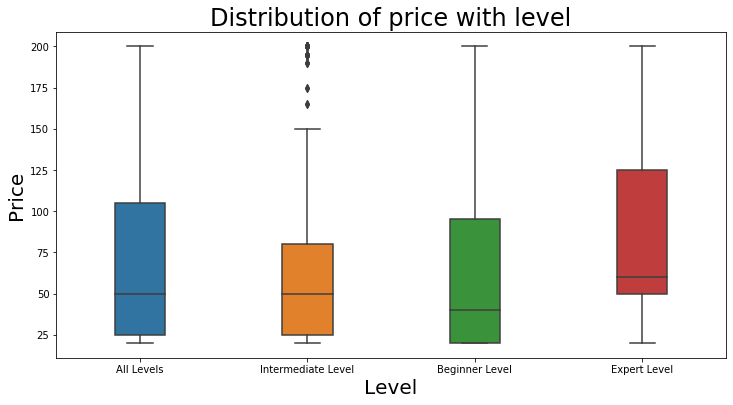

In [180]:
ax = sns.boxplot(x = 'level',y = 'price', data = paid_courses, orient = 'v', width = 0.3)
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Price', fontsize = 20)
ax.set_title('Distribution of price with level', fontsize  = 24)
ax.set_xlabel('Level', fontsize= 20)

Text(0.5, 0, 'Level')

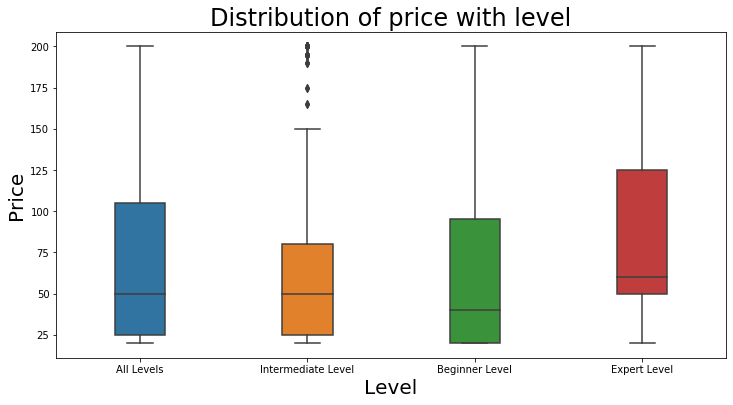

In [221]:
def subcount(df):
    a=[]
    b=[]
    for i in df["subject"].unique():
        a.append(df[df["subject"]==i]['num_subscribers'].sum())
        b.append(i)
    return a,b

No handles with labels found to put in legend.


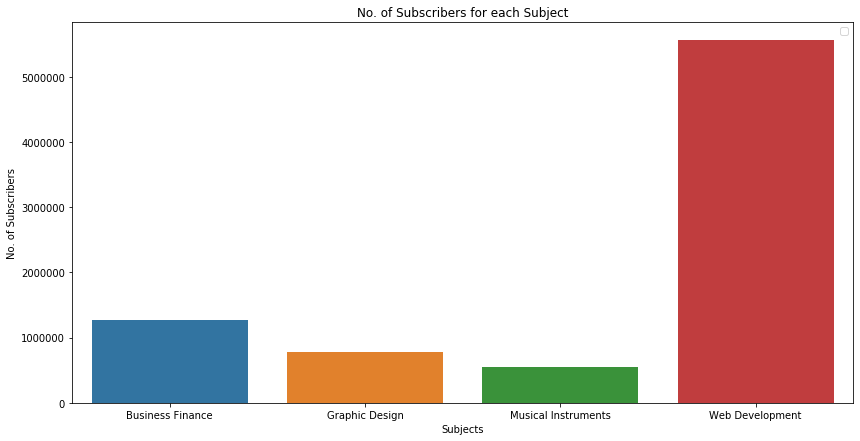

In [222]:
a,b=subcount(paid_courses)
plt.figure(figsize=(14,7))
plt.title("No. of Subscribers for each Subject")
plt.ylabel("No. of Subscribers")
plt.xlabel("Subjects")
sns.barplot(x=b,y=a)
plt.legend()

No handles with labels found to put in legend.


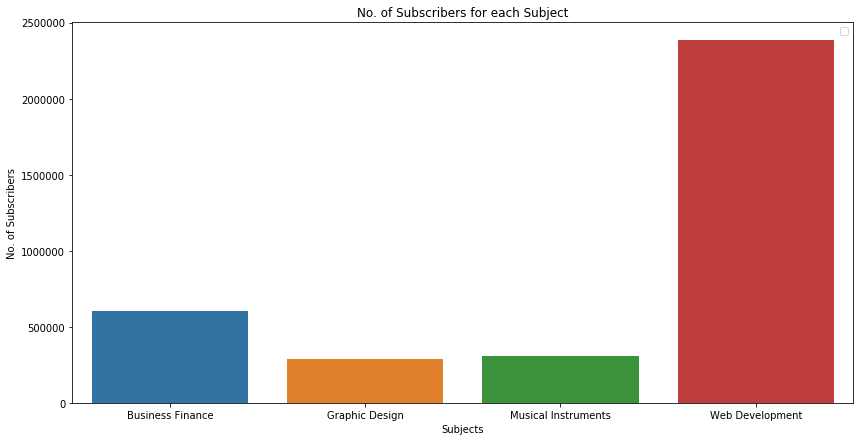

In [223]:
a,b=subcount(free_courses)
plt.figure(figsize=(14,7))
plt.title("No. of Subscribers for each Subject")
plt.ylabel("No. of Subscribers")
plt.xlabel("Subjects")
sns.barplot(x=b,y=a)
plt.legend()

In [236]:
fig = px.scatter(df, x="price", y="num_subscribers")
fig.update_layout(title="Course price and number of subscribers",
                 xaxis_title="Price",
                 yaxis_title="Number of subscribers"
                 )
fig.show()

In [231]:
#distribution of duration

In [245]:
fig = px.scatter(paid_courses, x="content_duration", y="num_subscribers", color="subject")
fig.update_layout(title="Course content duration and number of subscribers",
                 xaxis_title="Content duration",
                 yaxis_title="Number of subscribers"
                 )
fig.show()

In [246]:
fig = px.scatter(free_courses, x="content_duration", y="num_subscribers", color="subject")
fig.update_layout(title="Course content duration and number of subscribers",
                 xaxis_title="Content duration",
                 yaxis_title="Number of subscribers"
                 )
fig.show()

In [247]:
fig = px.scatter(paid_courses, x="num_reviews", y="num_subscribers", color="subject")
fig.update_layout(title="Course number of reviews and number of subscribers",
                 xaxis_title="Number of reviews",
                 yaxis_title="Number of subscribers"
                 )
fig.show()

In [248]:
fig = px.scatter(free_courses, x="num_reviews", y="num_subscribers", color="subject")
fig.update_layout(title="Course number of reviews and number of subscribers",
                 xaxis_title="Number of reviews",
                 yaxis_title="Number of subscribers"
                 )
fig.show()

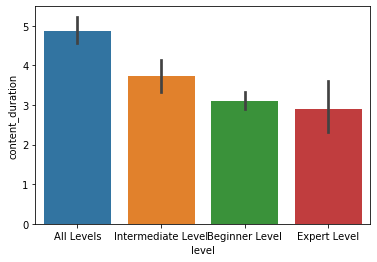

In [260]:
sns.barplot(x='level',y='content_duration', data = df)
fig = plt.figure(figsize=(13,6))

ax = sns.countplot('level', data=free_courses, palette='pastel',hue = 'subject')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Subject Distribution by\n\nDistribution by Level', fontsize=14, weight='bold')



Text(0, 0.5, 'Count')

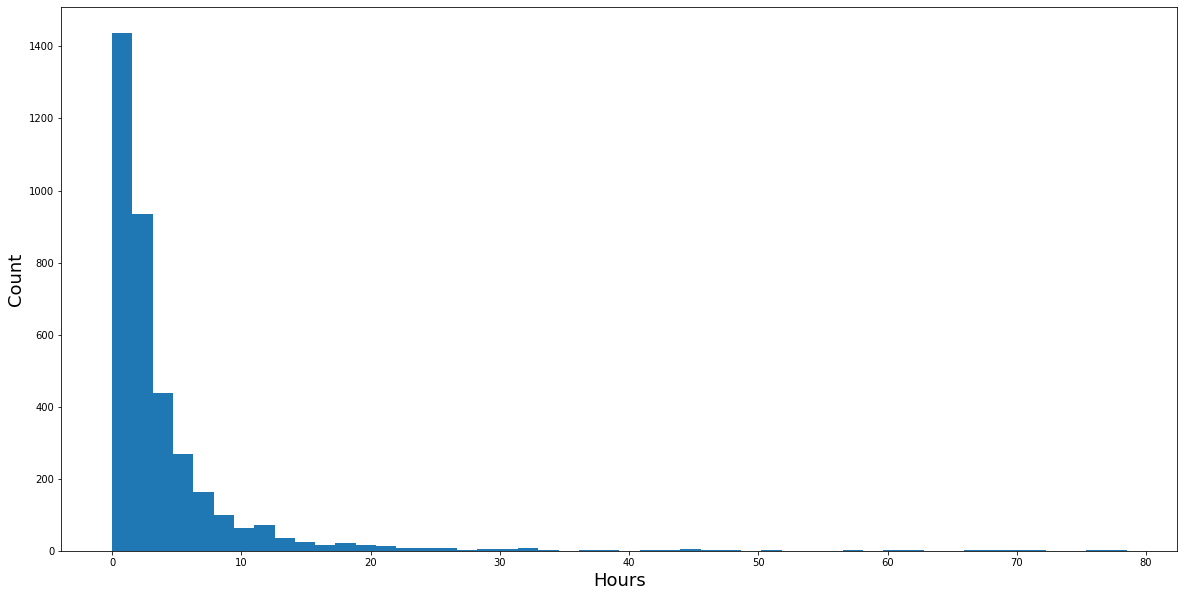

In [330]:

fig = plt.figure(figsize=(20,10))
axes = fig.subplots()
axes.hist(df['content_duration'], bins=50)
axes.set_xlabel('Hours', fontsize='18')
axes.set_ylabel('Count', fontsize='18')

In [262]:
# Time series part

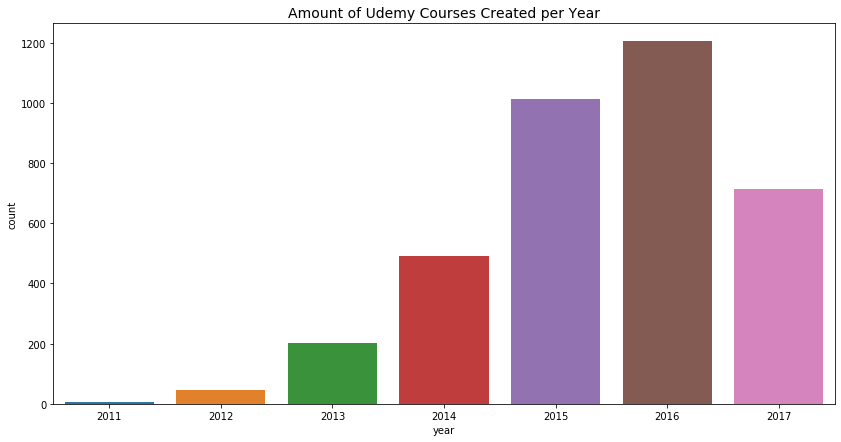

In [263]:

plt.figure(figsize = (14,7))
sns.countplot(x = df['year'], data = df)
plt.title("Amount of Udemy Courses Created per Year", fontsize = 14)
plt.show()

In [265]:
sum(df['year']==2016),sum(df['year']==2017)

(1204, 713)

In [271]:
df[df['year']==2016]['month'].value_counts()

2     123
4     113
3     112
12    100
5      98
11     97
10     97
8      97
1      96
6      94
9      93
7      84
Name: month, dtype: int64

In [270]:
df[df['year']==2017]['month'].value_counts()

5    153
6    120
2    114
3    112
4    104
1     83
7     27
Name: month, dtype: int64

In [272]:
df[df['year']==2011]['month'].value_counts()

11    2
7     1
12    1
9     1
Name: month, dtype: int64

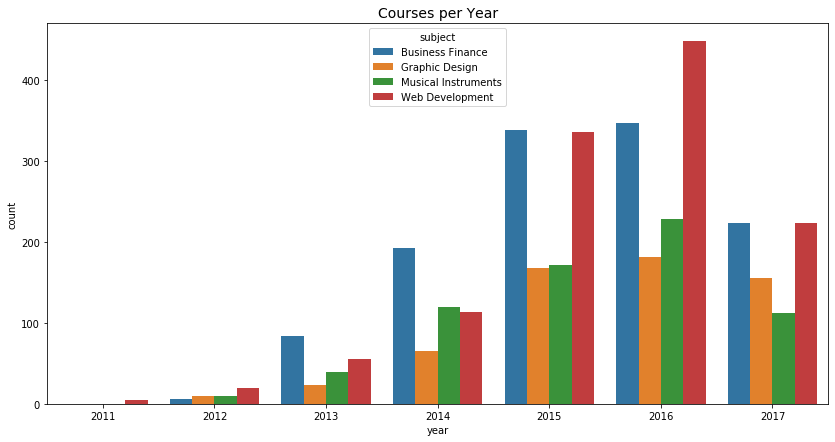

In [279]:
plt.figure(figsize = (14,7))
sns.countplot(x = df.year, data = df, hue = df.subject)
plt.title("Courses per Year", fontsize = 14)
plt.show()

In [329]:
subjects = df['subject'].unique()

subset = df[['date_published','subject']]
subset = subset.sort_values('date_published')
time_series = subset['date_published'].value_counts().reset_index()
time_series.columns = ['Date', 'Counts']
time_series = time_series.sort_values('Date')
time_series['Count'] = time_series['Counts'].cumsum()
dummies = pd.get_dummies(subset['subject'])

subset = subset.join(dummies)
subset['Business'] = subset['Business Finance'].cumsum()
subset['Web'] = subset['Web Development'].cumsum()
subset['Music'] = subset['Musical Instruments'].cumsum()
subset['Design'] = subset['Graphic Design'].cumsum()
subset_melt = subset.melt(id_vars='date_published', value_vars=['Business', 'Web', 'Design', 'Music'])

fig = make_subplots(rows=2,cols=1,subplot_titles=("Time series plot of number of courses","Time series plot of number of courses by subject"))
df.sort_values('date_published', inplace=True)
fig.append_trace(go.Scatter(x=time_series['Date'],y=time_series['Count'],name="All",mode='lines'),row=1, col=1)
fig.append_trace(go.Scatter(x=subset['date_published'],y=subset['Business'],mode="lines",name="Business Finance",line=dict(color="crimson")),row=2, col=1)
fig.append_trace(go.Scatter(x=subset['date_published'],y=subset['Web'],mode="lines",name="Web Development",line=dict(color="gold", dash="longdashdot"),),row=2, col=1)
fig.append_trace(go.Scatter(x=subset['date_published'],y=subset['Design'],mode="lines",name="Graphic Design",line=dict(color="steelblue", dash="dash")),row=2, col=1)
fig.append_trace(go.Scatter(x=subset['date_published'],y=subset['Music'],mode="lines",name="Musical Instruments",line=dict(color="green", dash="dashdot")),row=2, col=1)
fig.update_layout(width=700, height=800)
fig.show()

In [317]:
pd.to_datetime(df['published_timestamp']).dt.date


0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_timestamp, Length: 3672, dtype: object

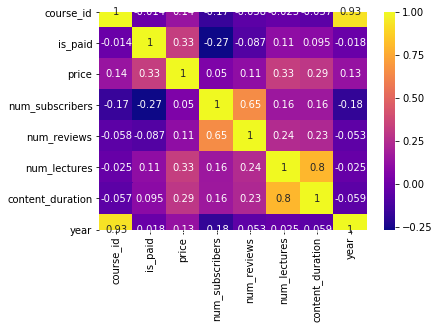

In [241]:
sns.heatmap(df.corr(),  cmap = 'plasma', annot = True)

In [331]:
#popular courses

In [332]:
#this is over all
data_sorted=df.sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [347]:
data_sorted=df[df["subject"]=="Web Development"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [348]:
data_sorted=df[df["subject"]=="Business Finance"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [349]:
data_sorted=df[df["subject"]=="Musical Instruments"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [350]:
data_sorted=df[df["subject"]=="Graphic Design"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [333]:
#paid ones
data_sorted=paid_courses.sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [352]:
#paid ones
data_sorted=paid_courses[paid_courses['subject']=="Business Finance"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [353]:
#paid ones
data_sorted=paid_courses[paid_courses['subject']=="Web Development"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [354]:
#paid ones
data_sorted=paid_courses[paid_courses['subject']=="Musical Instruments"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [355]:
#paid ones
data_sorted=paid_courses[paid_courses['subject']=="Graphic Design"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [334]:
#free courses
data_sorted=free_courses.sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [356]:
#free courses
data_sorted=free_courses[free_courses["subject"]=="Business Finance"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [357]:
#free courses
data_sorted=free_courses[free_courses["subject"]=="Web Development"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [358]:
#free courses
data_sorted=free_courses[free_courses["subject"]=="Musical Instruments"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [359]:
#free courses
data_sorted=free_courses[free_courses["subject"]=="Graphic Design"].sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()

In [337]:
#over all
data_sorted_reviews=df.sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [343]:
#over all
data_sorted_reviews=df[df["subject"]=="Business Finance"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [344]:
#over all
data_sorted_reviews=df[df["subject"]=="Web Development"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [345]:
#over all
data_sorted_reviews=df[df["subject"]=="Musical Instruments"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [346]:
data_sorted_reviews=df[df["subject"]=="Graphic Design"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [360]:
#paid 
data_sorted_reviews=paid_courses.sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:5],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [361]:
#paid 
data_sorted_reviews=paid_courses[paid_courses["subject"]=="Business Finance"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:5],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [362]:
#paid 
data_sorted_reviews=paid_courses[paid_courses["subject"]=="Web Development"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:5],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [363]:
#paid 
data_sorted_reviews=paid_courses[paid_courses["subject"]=="Graphic Design"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:5],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [364]:
#paid 
data_sorted_reviews=paid_courses[paid_courses["subject"]=="Musical Instruments"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:5],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [340]:
#free
data_sorted_reviews=free_courses.sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [365]:
#free
data_sorted_reviews=free_courses[free_courses["subject"]=="Business Finance"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [366]:
data_sorted_reviews=free_courses[free_courses["subject"]=="Web Development"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [367]:
data_sorted_reviews=free_courses[free_courses["subject"]=="Musical Instruments"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [368]:
data_sorted_reviews=free_courses[free_courses["subject"]=="Graphic Design"].sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Most reviewed Courses')
fig.update_layout(showlegend=False, width=600)
fig.show()
